In [13]:
import torch
import requests
from statistics import mean
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

In [35]:
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
# results = model(['https://www.brianhonigman.com/wp-content/uploads/2015/10/Large-crowd-of-people-014.jpg'])
# results.show()

Using cache found in /Users/mtrencseni/.cache/torch/hub/ultralytics_yolov5_master


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2021-6-15 torch 1.7.1 CPU



requirements: Command 'pip install 'PyYAML>=5.3.1'' returned non-zero exit status 1.


In [3]:
image = Image.open('/Users/mtrencseni/porsche911.png')
width, height = image.size

In [4]:
ms = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
mx = torch.hub.load('ultralytics/yolov5', 'yolov5x', pretrained=True)

Using cache found in /Users/mtrencseni/.cache/torch/hub/ultralytics_yolov5_master


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


requirements: Command 'pip install 'PyYAML>=5.3.1'' returned non-zero exit status 1.


YOLOv5 🚀 2021-6-15 torch 1.7.1 CPU

Using cache found in /Users/mtrencseni/.cache/torch/hub/ultralytics_yolov5_master


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
requirements: Command 'pip install 'PyYAML>=5.3.1'' returned non-zero exit status 1.


Fusing layers... 
Model Summary: 476 layers, 87730285 parameters, 0 gradients
Adding AutoShape... 
YOLOv5 🚀 2021-6-15 torch 1.7.1 CPU



In [5]:
# imgs = [image]
# results = mx(imgs)
# results.print()
# results.show()

In [6]:
def confidence(df, target_class):
    if len(df) > 0:
        if df['name'].iloc[0] == target_class:
            return df['confidence'].iloc[0]
    return 0

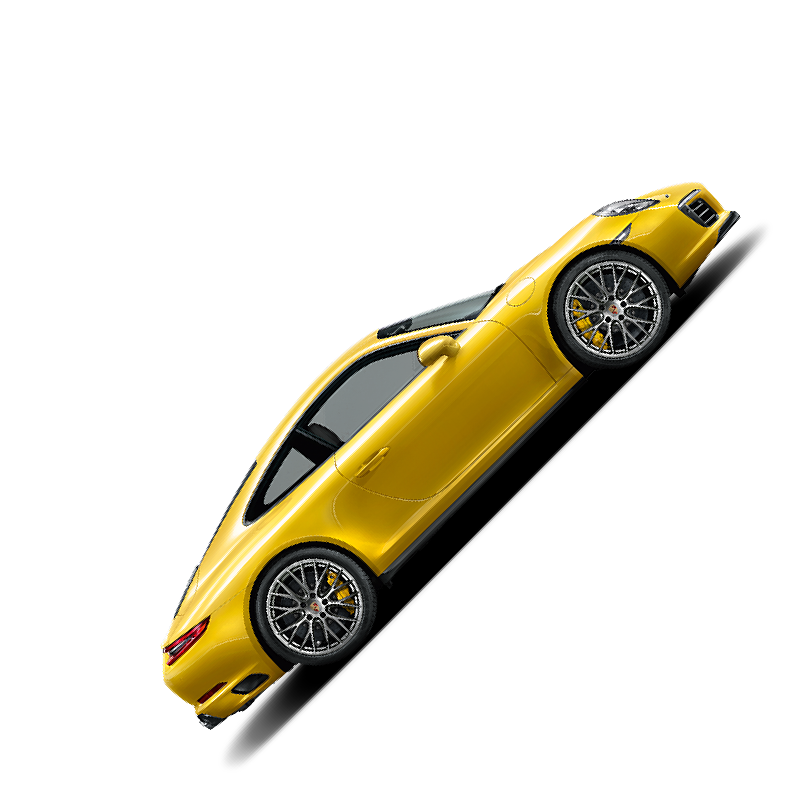

In [7]:
angle = 45
image_mod = image.rotate(angle)
image_mod

In [8]:
%matplotlib inline

In [21]:
def modify_image_detect():
    results = []
    for angle in range(0, 91, 1):
        image_mod = image.rotate(angle)
        detections = ms([image_mod]), mx([image_mod])
        confs = confidence(detections[0].pandas().xyxy[0], 'car'), confidence(detections[1].pandas().xyxy[0], 'car')
        print('%02d %.2f %.2f' % (angle, confs[0], confs[1]), end='\r')
        results_rot.append((angle, confs))

def plot(results, title, xlabel, ylabel, ylim):
    plt.figure(figsize=(14, 4))
    plt.plot(
        [r[0] for r in results],
        [r[1][0] for r in results],
        marker='o',
        label='YOLOv5s'
    )
    plt.plot(
        [r[0] for r in results],
        [r[1][1] for r in results],
        marker='o',
        label='YOLOv5x'
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    plt.legend()
    plt.show()

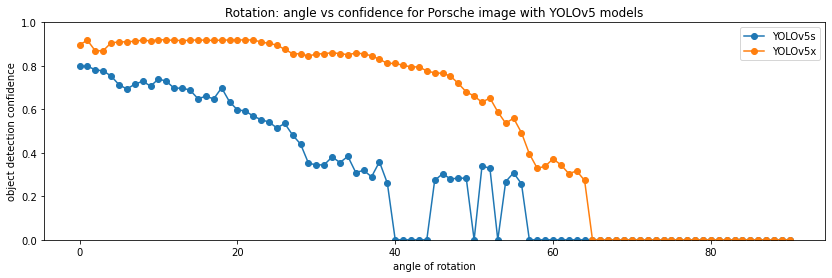

In [23]:
results_rot = []
for angle in range(0, 91, 1):
    image_mod = image.rotate(angle)
    detections = ms([image_mod]), mx([image_mod])
    confs = confidence(detections[0].pandas().xyxy[0], 'car'), confidence(detections[1].pandas().xyxy[0], 'car')
    print('%02d %.2f %.2f' % (angle, confs[0], confs[1]), end='\r')
    results_rot.append((angle, confs))

plot(
    results_rot,
    title='Rotation: angle vs confidence for Porsche image with YOLOv5 models',
    xlabel='angle of rotation',
    ylabel='object detection confidence',
    ylim=(0, 1),
)

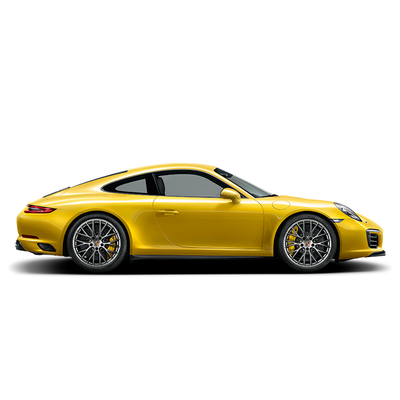

In [11]:
scale = 0.5
image_mod = image.resize((int(width*scale), int(height*scale)), Image.ANTIALIAS)
image_mod

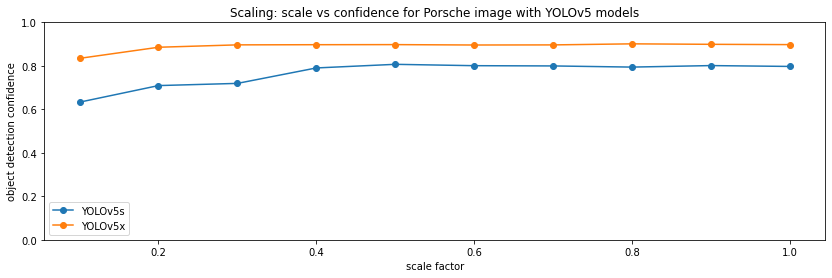

In [25]:
results_scale = []
for scale in np.arange(0.1, 1.1, 0.1):
    image_mod = image.resize((int(width*scale), int(height*scale)), Image.ANTIALIAS)
    detections = ms([image_mod]), mx([image_mod])
    confs = confidence(detections[0].pandas().xyxy[0], 'car'), confidence(detections[1].pandas().xyxy[0], 'car')
    print('%.1f %.2f %.2f' % (scale, confs[0], confs[1]), end='\r')
    results_scale.append((scale, confs))

plot(
    results_scale,
    title='Scaling: scale vs confidence for Porsche image with YOLOv5 models',
    xlabel='scale factor',
    ylabel='object detection confidence',
    ylim=(0, 1),
)

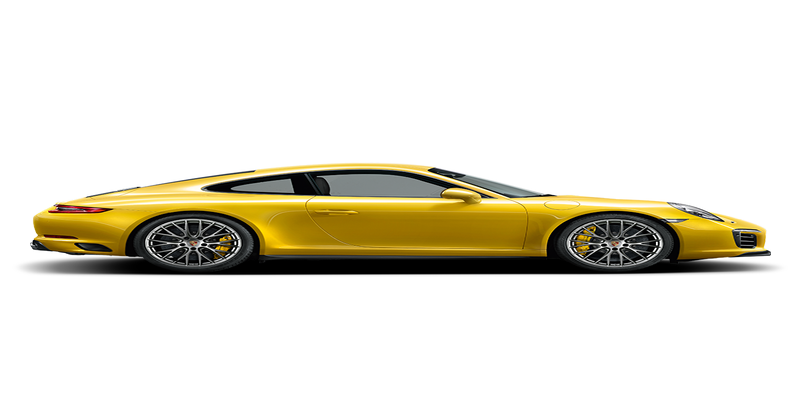

In [26]:
scale = 0.5
image_mod = image.resize((width, int(height*scale)), Image.ANTIALIAS)
image_mod

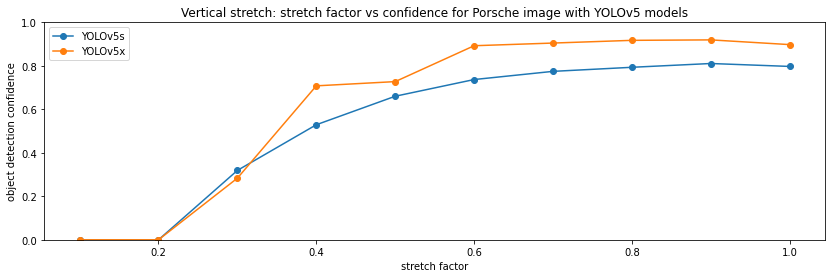

In [27]:
results_sy = []
for scale in np.arange(0.1, 1.1, 0.1):
    image_mod = image.resize((width, int(height*scale)), Image.ANTIALIAS)
    detections = ms([image_mod]), mx([image_mod])
    confs = confidence(detections[0].pandas().xyxy[0], 'car'), confidence(detections[1].pandas().xyxy[0], 'car')
    print('%.1f %.2f %.2f' % (scale, confs[0], confs[1]), end='\r')
    results_sy.append((scale, confs))

plot(
    results_sy,
    title='Vertical stretch: stretch factor vs confidence for Porsche image with YOLOv5 models',
    xlabel='stretch factor',
    ylabel='object detection confidence',
    ylim=(0, 1),
)

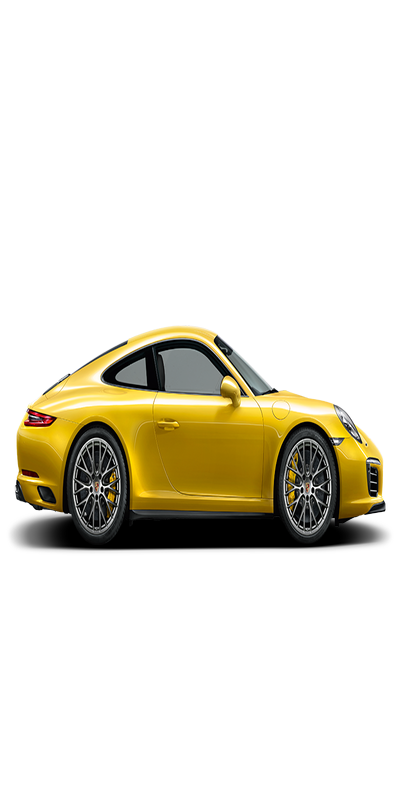

In [28]:
scale = 0.5
new_size = int(800 * scale)
image_mod = image.resize((new_size, 800), Image.ANTIALIAS)
image_mod

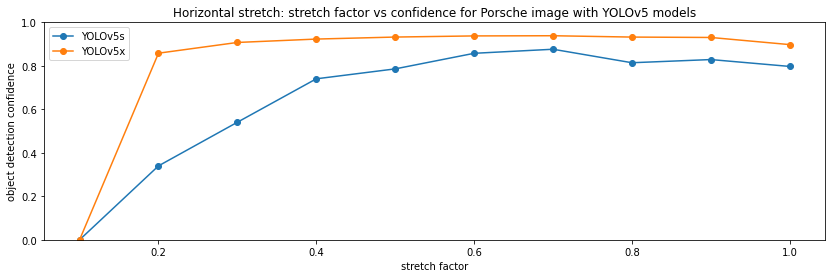

In [29]:
results_sx = []
for scale in np.arange(0.1, 1.1, 0.1):
    image_mod = image.resize((int(width*scale), height), Image.ANTIALIAS)
    detections = ms([image_mod]), mx([image_mod])
    confs = confidence(detections[0].pandas().xyxy[0], 'car'), confidence(detections[1].pandas().xyxy[0], 'car')
    print('%.1f %.2f %.2f' % (scale, confs[0], confs[1]), end='\r')
    results_sx.append((scale, confs))

plot(
    results_sx,
    title='Horizontal stretch: stretch factor vs confidence for Porsche image with YOLOv5 models',
    xlabel='stretch factor',
    ylabel='object detection confidence',
    ylim=(0, 1),
)

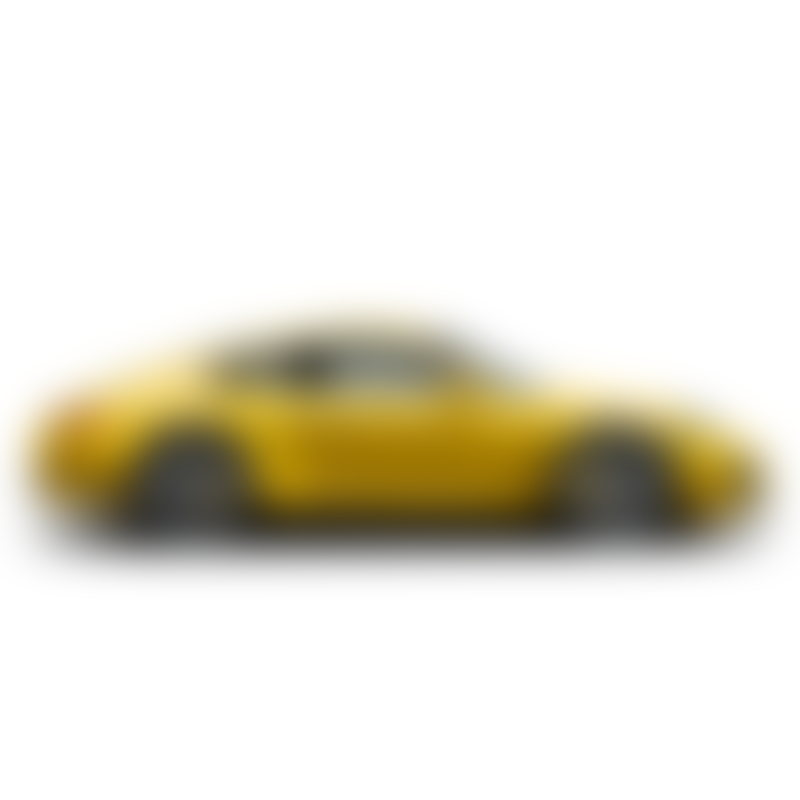

In [30]:
blur = 20
image_mod = image.filter(ImageFilter.GaussianBlur(blur))
image_mod

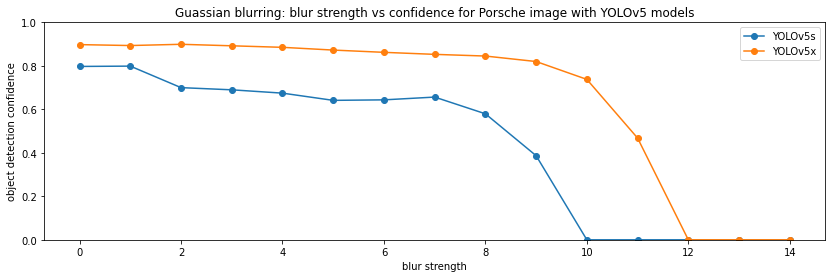

In [31]:
results_blur = []
for blur in range(0, 15, 1):
    image_mod = image.filter(ImageFilter.GaussianBlur(blur))
    detections = ms([image_mod]), mx([image_mod])
    confs = confidence(detections[0].pandas().xyxy[0], 'car'), confidence(detections[1].pandas().xyxy[0], 'car')
    print('%d %.2f %.2f' % (blur, confs[0], confs[1]), end='\r')
    results_blur.append((blur, confs))

plot(
    results_blur,
    title='Guassian blurring: blur strength vs confidence for Porsche image with YOLOv5 models',
    xlabel='blur strength',
    ylabel='object detection confidence',
    ylim=(0, 1),
)

In [32]:
def num_detected(df, target_class):
    return sum(row['name'] == target_class for _, row in df.iterrows())
    
def avg_confidence(df, target_class):
    return mean(row['confidence'] for _, row in df.iterrows() if row['name'] == target_class)

In [33]:
image = Image.open(requests.get('https://www.brianhonigman.com/wp-content/uploads/2015/10/Large-crowd-of-people-014.jpg', stream=True).raw)
detections = ms([image]), mx([image])
num_detected(detections[0].pandas().xyxy[0], 'person'), num_detected(detections[1].pandas().xyxy[0], 'person')

(24, 43)

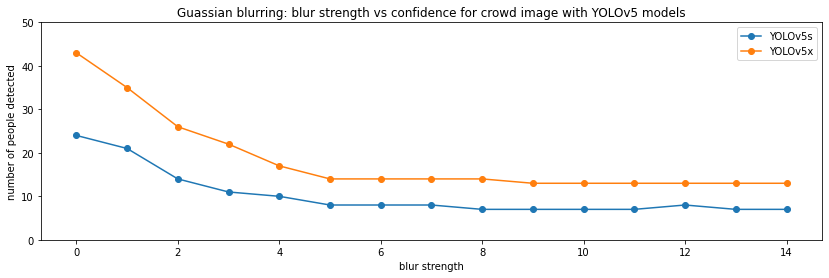

In [34]:
results_ppl = []
for blur in range(0, 15, 1):
    image_mod = image.filter(ImageFilter.GaussianBlur(blur))
    detections = ms([image_mod]), mx([image_mod])
    nums = num_detected(detections[0].pandas().xyxy[0], 'person'), num_detected(detections[1].pandas().xyxy[0], 'person')
    print('%d %d %d' % (blur, nums[0], nums[1]), end='\r')
    results_ppl.append((blur, nums))

plot(
    results_ppl,
    title='Guassian blurring: blur strength vs confidence for crowd image with YOLOv5 models',
    xlabel='blur strength',
    ylabel='number of people detected',
    ylim=(0, 50),
)

In [ ]:
results